In [21]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import pandas as pd
import pprint
import getpass

from datetime import datetime
from time import sleep
from random import SystemRandom

try:
    import robin_stocks.robinhood as r
except ImportError:
    pass

In [25]:
RAND = SystemRandom()
ACTIONS = {1: [0.6, 0.4],
           2: [0.57, 0.43],
           3: [0.65, 0.35],
           4: [0.75, 0.25],
           5: [0.48, 0.52],
           6: [0.6, 0.4],
           8: [0, 1],
           9: [0.7, 0.3],
           10: [0.53, 0.47],
           13: [0.76, 0.24],
           14: [0.76, 0.24],
           15: [0.65, 0.35],
           17: [0.64, 0.36],
           18: [0.59, 0.41],
           19: [1, 0],
           22: [0.14, 0.86],
           23: [0.67, 0.33],
           25: [0, 1],
           26: [0.7, 0.3],
           27: [0.71, 0.29],
           28: [0.27, 0.44],
           29: [0.23, 0.4],
           30: [0.33, 0.33],
           32: [0.4, 0.4],
           33: [0.26, 0.53],
           36: [0.6, 0.3],
           37: [0.19, 0.55],
           38: [0, 0.6],
           40: [0.3, 0.41],
           41: [0.27, 0.5],
           42: [0.21, 0.46],
           43: [1, 0],
           44: [0.29, 0.57],
           45: [0.29, 0.47],
           46: [0, 0.67],
           49: [0.19, 0.38],
           50: [0.15, 0.62],
           52: [0, 0.5],
           53: [0.42, 0.46],
           54: [0.25, 0.44],
           55: [0, 0.3],
           56: [0, 0.33],
           57: [0, 0],
           59: [0, 0],
           60: [0, 0.25],
           63: [0, 1],
           64: [0, 0.4],
           65: [0, 0.33],
           67: [0, 0.38],
           68: [0, 0.35],
           69: [0, 0.35],
           72: [0, 0.44],
           73: [0, 0.32],
           74: [0, 0.5],
           76: [0, 0.36],
           77: [0, 0.38],
           78: [0, 0.64],
           79: [0, 0.48],
           80: [0, 0.36],
           81: [0, 0.42]}

In [2]:
username = 'watsona4@gmail.com'
password = getpass.getpass()

 ····


In [3]:
r.login(username, password)

NameError: name 'r' is not defined

In [56]:
h = r.get_crypto_historicals('BTC', interval='5minute', span='week')

ERROR: Span must be "hour","day","week","month","3month","year",or "5year"


In [53]:
df = pd.DataFrame(h)
df['begins_at'] = pd.to_datetime(df['begins_at']).dt.tz_localize(None)

In [54]:
df.to_csv('btc_5minute_week_20210421.csv')

In [9]:
df = pd.read_csv('btc_5minute_week_20210421.csv', usecols=['begins_at', 'open_price'], parse_dates=['begins_at'])

In [57]:
r.get_crypto_quote('BTC')

{'ask_price': '54896.734322',
 'bid_price': '54849.110000',
 'mark_price': '54872.922161',
 'high_price': '56565.285000',
 'low_price': '54197.898876',
 'open_price': '55306.480000',
 'symbol': 'BTCUSD',
 'id': '3d961844-d360-45fc-989b-f6fca761d511',
 'volume': '0.000000'}

In [14]:
i = 0
def get_next_price():
    global i
    i += 1
    #time.sleep(300)
    #quote = r.get_crypto_quote('BTC')
    #return {'time': etime(datetime.now()), 'price': float(quote['ask_price'])}
    return {'time': etime(df.iloc[i-1]['begins_at']), 'price': df.iloc[i-1]['open_price']}

def etime(x):
    return (x - datetime(1900, 1, 1)).total_seconds()/3600/24

In [23]:
def get_action(box):
    b = ACTIONS[box]
    rand = RAND.random()
    if rand < b[0]:
        return 'BUY'
    if rand < b[0] + b[1]:
        return 'HOLD'
    return 'SELL'

In [30]:
def buy(shares, value, price):
    if value == 0:
        return shares
    #order = r.order_buy_crypto_by_price('BTC', value)
    #return float(order.quantity)
    return value/price

def sell(shares, value, price):
    if shares == 0:
        return value
    #order = r.order_sell_crypto_by_quantity('BTC', shares)
    #return float(order.price)
    return shares*price

In [32]:
i = 0
last_act = 'SELL'
shares = 0
value = 100

p0 = pp1 = pp2 = pp3 = None

while True:
    
    p1 = p0
    p0 = get_next_price()
    
    if p1 is None: continue

    pp1old = pp1
    pp1 = (p0['price'] - p1['price'])/(p0['price']*(p0['time'] - p1['time']))
    
    if pp1old is None: continue
    
    pp2old = pp2
    pp2 = (pp1 - pp1old)/(500*(p0['time'] - p1['time']))
    
    if pp2old is None: continue
    
    pp3old = pp3
    pp3 = (pp2 - pp2old)/(500*(p0['time'] - p1['time']))
    
    if pp3old is None: continue
    
    pp4 = (pp3 - pp3old)/(500*(p0['time'] - p1['time']))
    
    def boxpp(x):
        if x < -0.2:
            return 0
        if x < 0.2:
            return 1
        return 2

    box = 27*boxpp(pp1) + 9*boxpp(pp2) + 3*boxpp(pp3) + boxpp(pp4) + 1
    
    action = get_action(box)
    
    if action == 'BUY' and last_act != 'BUY':
        shares = buy(shares, value, p0['price'])
    elif action == 'SELL' and last_act != 'SELL':
        value = sell(shares, value, p0['price'])
    else:
        last_act = 'HOLD'

    print(f'action={action:4s}, shares={shares:.4f}, value={value:.2f}')

action=HOLD, shares=0.0000, value=100.00
action=HOLD, shares=0.0000, value=100.00
action=SELL, shares=0.0000, value=100.00
action=BUY , shares=0.0018, value=100.00
action=SELL, shares=0.0018, value=100.45
action=HOLD, shares=0.0018, value=100.45
action=SELL, shares=0.0018, value=100.44
action=BUY , shares=0.0018, value=100.44
action=BUY , shares=0.0018, value=100.44
action=SELL, shares=0.0018, value=100.64
action=HOLD, shares=0.0018, value=100.64
action=HOLD, shares=0.0018, value=100.64
action=HOLD, shares=0.0018, value=100.64
action=HOLD, shares=0.0018, value=100.64
action=HOLD, shares=0.0018, value=100.64
action=BUY , shares=0.0018, value=100.64
action=BUY , shares=0.0018, value=100.64
action=SELL, shares=0.0018, value=101.19
action=HOLD, shares=0.0018, value=101.19
action=BUY , shares=0.0018, value=101.19
action=HOLD, shares=0.0018, value=101.19
action=SELL, shares=0.0018, value=101.05
action=HOLD, shares=0.0018, value=101.05
action=BUY , shares=0.0018, value=101.05
action=HOLD, sha

IndexError: single positional indexer is out-of-bounds

In [92]:
for line in buys:
    print(f'{line[0]:.6f}, pp1={line[1]:+.6f}, pp2={line[2]:+.6f}, pp3={line[3]:+.6f}, pp4={line[4]:+.6f}')

0.392922, pp1=-0.000971, pp2=-0.000197, pp3=+0.001858, pp4=+0.007796
0.393500, pp1=-0.001164, pp2=-0.002288, pp3=-0.002794, pp4=-0.001711
0.395827, pp1=-0.000076, pp2=-0.000342, pp3=-0.000274, pp4=-0.000026
0.395499, pp1=-0.000227, pp2=+0.000030, pp3=+0.000163, pp4=+0.000258
0.395882, pp1=-0.000430, pp2=-0.001243, pp3=-0.002283, pp4=-0.003293
0.396216, pp1=-0.000474, pp2=-0.000482, pp3=-0.000177, pp4=+0.000135
0.396402, pp1=-0.000363, pp2=-0.000912, pp3=-0.001935, pp4=-0.003440
0.395765, pp1=-0.000896, pp2=-0.001106, pp3=-0.001267, pp4=-0.001016
0.396223, pp1=-0.000227, pp2=-0.000912, pp3=-0.002493, pp4=-0.005180
0.396581, pp1=-0.000199, pp2=-0.000120, pp3=+0.000595, pp4=+0.002173
0.396766, pp1=-0.000093, pp2=-0.000371, pp3=-0.000848, pp4=-0.001445
0.394868, pp1=-0.000331, pp2=+0.000231, pp3=+0.000305, pp4=+0.000435
0.395003, pp1=-0.000142, pp2=-0.000419, pp3=-0.001027, pp4=-0.001404
0.394938, pp1=-0.000131, pp2=-0.000197, pp3=-0.000405, pp4=-0.001032
0.395301, pp1=-0.000989, pp2=-0.00

In [93]:
for line in sells:
    print(f'{line[0]:.6f}, pp1={line[1]:+.6f}, pp2={line[2]:+.6f}, pp3={line[3]:+.6f}, pp4={line[4]:+.6f}')

0.394667, pp1=+0.001281, pp2=+0.003883, pp3=+0.009110, pp4=+0.018734
0.394664, pp1=+0.001124, pp2=+0.000506, pp3=-0.001083, pp4=-0.002869
0.395903, pp1=+0.000266, pp2=-0.000068, pp3=-0.000248, pp4=-0.001525
0.396193, pp1=+0.000366, pp2=+0.000442, pp3=+0.000784, pp4=+0.001058
0.396312, pp1=+0.000813, pp2=+0.001040, pp3=+0.001010, pp4=+0.000847
0.396690, pp1=+0.000008, pp2=-0.000305, pp3=-0.000312, pp4=-0.000194
0.396765, pp1=+0.000549, pp2=+0.001023, pp3=+0.001505, pp4=+0.001682
0.396661, pp1=+0.000210, pp2=+0.000161, pp3=-0.000251, pp4=-0.001575
0.396450, pp1=+0.000685, pp2=+0.001581, pp3=+0.002687, pp4=+0.003954
0.396859, pp1=+0.000636, pp2=+0.000863, pp3=+0.001775, pp4=+0.004268
0.396859, pp1=+0.000278, pp2=+0.000477, pp3=+0.000597, pp4=+0.000002
0.397108, pp1=+0.000342, pp2=+0.000435, pp3=+0.000806, pp4=+0.001654
0.395145, pp1=+0.000277, pp2=+0.000608, pp3=+0.000377, pp4=+0.000072
0.395069, pp1=+0.000066, pp2=+0.000208, pp3=+0.000627, pp4=+0.001654
0.396290, pp1=+0.000144, pp2=-0.00

In [94]:
for line in holds:
    print(f'{line[0]:.6f}, pp1={line[1]:+.6f}, pp2={line[2]:+.6f}, pp3={line[3]:+.6f}, pp4={line[4]:+.6f}')

0.393893, pp1=-0.000774, pp2=-0.002055, pp3=-0.005938, pp4=-0.015048
0.393540, pp1=+0.000618, pp2=+0.001589, pp3=+0.001786, pp4=-0.000072
0.393898, pp1=+0.000398, pp2=+0.001562, pp3=+0.003850, pp4=+0.006644
0.395149, pp1=+0.001251, pp2=+0.000853, pp3=-0.000709, pp4=-0.004559
0.395303, pp1=+0.000154, pp2=-0.001097, pp3=-0.001950, pp4=-0.001241
0.395637, pp1=+0.000334, pp2=+0.000180, pp3=+0.001277, pp4=+0.003227
0.396107, pp1=-0.000086, pp2=-0.000452, pp3=-0.000894, pp4=-0.001678
0.395983, pp1=-0.000124, pp2=-0.000038, pp3=+0.000414, pp4=+0.001308
0.395726, pp1=-0.000257, pp2=-0.000133, pp3=-0.000095, pp4=-0.000509
0.396063, pp1=+0.000181, pp2=+0.000611, pp3=+0.001854, pp4=+0.004137
0.396369, pp1=+0.000306, pp2=+0.000125, pp3=-0.000486, pp4=-0.002340
0.396682, pp1=+0.000313, pp2=+0.000007, pp3=-0.000118, pp4=+0.000368
0.396451, pp1=+0.000049, pp2=+0.000412, pp3=+0.001324, pp4=+0.003259
0.396780, pp1=-0.000079, pp2=-0.000715, pp3=-0.001578, pp4=-0.003353
0.396793, pp1=-0.000315, pp2=-0.00

In [113]:
x = [line[1] for line in buys]
y = [line[2] for line in buys]
c = ['green' for line in buys]
x += [line[1] for line in sells]
y += [line[2] for line in sells]
c += ['red' for line in sells]
x += [line[1] for line in holds]
y += [line[2] for line in holds]
c += ['blue' for line in holds]

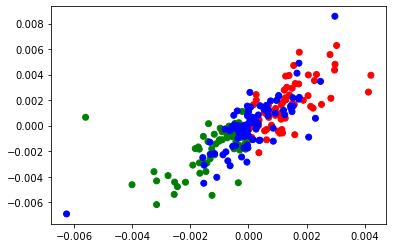

In [114]:
plt.scatter(x, y, c=c)

In [115]:
x = [line[1] for line in buys]
y = [line[3] for line in buys]
c = ['green' for line in buys]
x += [line[1] for line in sells]
y += [line[3] for line in sells]
c += ['red' for line in sells]
x += [line[1] for line in holds]
y += [line[3] for line in holds]
c += ['blue' for line in holds]

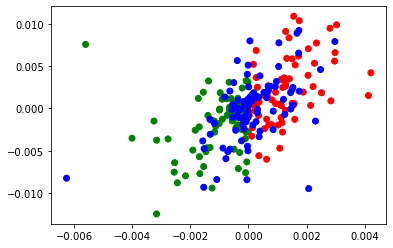

In [116]:
plt.scatter(x, y, c=c)

In [117]:
x = [line[1] for line in buys]
y = [line[4] for line in buys]
c = ['green' for line in buys]
x += [line[1] for line in sells]
y += [line[4] for line in sells]
c += ['red' for line in sells]
x += [line[1] for line in holds]
y += [line[4] for line in holds]
c += ['blue' for line in holds]

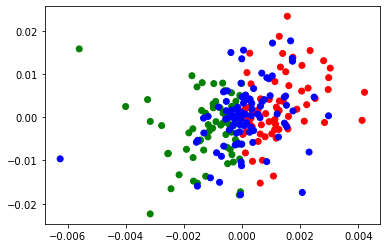

In [118]:
plt.scatter(x, y, c=c)

In [124]:
x = []
y = []
c = []
for line in buys:
    if line[1] != 0:
        x.append(line[2]/line[1])
        y.append(line[3]/line[1])
        c.append('green')
for line in sells:
    if line[1] != 0:
        x.append(line[2]/line[1])
        y.append(line[3]/line[1])
        c.append('red')
for line in holds:
    if line[1] != 0:
        x.append(line[2]/line[1])
        y.append(line[3]/line[1])
        c.append('blue')

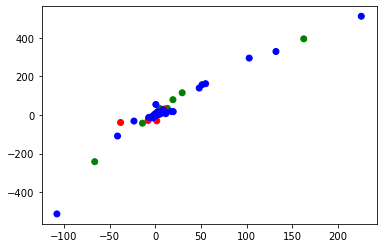

In [125]:
plt.scatter(x, y, c=c)

In [142]:
x = [line[1] for line in buys]
y = [line[2]*line[4] for line in buys]
c = ['green' for line in buys]
x += [line[1] for line in holds]
y += [line[2]*line[4] for line in holds]
c += ['blue' for line in holds]

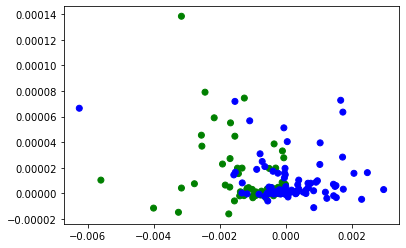

In [143]:
plt.scatter(x, y, c=c)

In [151]:
x = []
y = []
z = []
c = []
for line in buys:
    if line[1] != 0:
        x.append(line[1])
        y.append(line[2])
        z.append(line[3])
        c.append('green')
for line in sells:
    if line[1] != 0:
        x.append(line[1])
        y.append(line[2])
        z.append(line[3])
        c.append('red')
for line in holds:
    if line[1] != 0:
        x.append(line[1])
        y.append(line[2])
        z.append(line[3])
        c.append('blue')

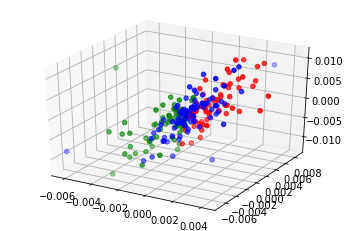

In [152]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c=c)
plt.show()